# Lead Coversion Process Assignment

## Business Objective

We must categorize or cluster the leads into two groups: hot and cool. This will be accomplished by analyzing prior data provided by X Education Company. The Company's employee will next focus on effectively communicating with the hot leads so that the majority of them convert. We have been assigned an 80% conversion rate objective, which requires us to appropriately categorize the leads.



---



## Importing Required Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')



---



## Loading and Observing Data

In [55]:
df_data = pd.read_csv(r"C:\Users\Dheeraj Chandra\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
df_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [56]:
# Observing the shape of DataFrame
print(f'Shape of Data: {df_data.shape}', end="\n\n")
print('Information of Data')
print(f'{df_data.info()}', end="\n\n")

Shape of Data: (9240, 37)

Information of Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page 

In [57]:
# Overview of Dataframe (Description, % of NaN) 
print('Description of Data (Numeric column)')
print(f'{df_data.describe()}', end="\n\n")
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Description of Data (Numeric column)
         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min        

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [58]:
# Conversion Rate for previous orders
round(len(df_data[df_data['Converted']==1].index)/len(df_data.index)*100,2)

38.54



---



## Data Cleaning

In [59]:
# Dropping duplicate rows from dataFrame
df_data=df_data.drop_duplicates()

In [60]:
# Replacing the value 'Select' with 'NaN'
df_data = df_data.replace('Select', np.nan)
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [61]:
# Making list of un-usable columns, due to most NaN value (Taking an arbitrary value >20 %)
unnecessary_column = set((pd.isnull(df_data).sum()/len(df_data.index) > .2).index)

# Making list of un-necessary columns from Analysis point of view
unnecessary_column = {'Prospect ID', 'Lead Number'}

# Making list of numerical columns from Analysis point of view
numerical_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

# Making list of categorical columns from Analysis point of view
categorical_column = {'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                      'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                      'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'}

# Making list of Target/Output column from Analysis point of view
target_column = {'Converted'}

In [62]:
# Dropping un-usable and un-necessary columns
df_data = df_data[list(numerical_column | categorical_column | target_column)]

# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Newspaper Article                           0.00
Newspaper                                   0.00
Do Not Email                                0.00
Through Recommendations                     0.00
Converted                                   0.00
I agree to pay the amount through cheque    0.00
Magazine                                    0.00
Last Activity                               1.11
Search                                      0.00
Get updates on DM Content                   0.00
A free copy of Mastering The Interview      0.00
Page Views Per Visit                        1.48
TotalVisits                                 1.48
Lead Source                                 0.39
Digital Advertisement                       0.00
Last Notable Activity                       0.00
Lead Origin                                 0.00
Receive More Updates About Our Courses      0.00
X Education Forums                          0.00
Total Time Spent on Website                 0.00
Do Not Call         

In [63]:
# Further removing the columns which have very less variation in data
df_data[list(categorical_column)].describe()

,Newspaper Article,Newspaper,Do Not Email,Through Recommendations,I agree to pay the amount through cheque,Magazine,Last Activity,Search,Get updates on DM Content,A free copy of Mastering The Interview,Lead Source,Digital Advertisement,Last Notable Activity,Lead Origin,Receive More Updates About Our Courses,X Education Forums,Do Not Call,Update me on Supply Chain Content
count,9240,9240,9240,9240,9240,9240,9137,9240,9240,9240,9204,9240,9240,9240,9240,9240,9240,9240
unique,2,2,2,2,1,1,17,2,1,2,21,2,16,5,1,2,2,1
top,No,No,No,No,No,No,Email Opened,No,No,No,Google,No,Modified,Landing Page Submission,No,No,No,No
freq,9238,9239,8506,9233,9240,9240,3437,9226,9240,6352,2868,9236,3407,4886,9240,9239,9238,9240


In [64]:
# Adding columns with negligible or no variation to unnecessary_column and removing from Dataframe since they would not serve any purpose for our analysis

# 'Get updates on DM Content' since all rows have same value, i.e. 'No'
unnecessary_column.add('Get updates on DM Content')
categorical_column.remove('Get updates on DM Content')

# 'Newspaper Article' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Newspaper Article')
categorical_column.remove('Newspaper Article')

# 'Magazine' since all rows have same value, i.e. 'No'
unnecessary_column.add('Magazine')
categorical_column.remove('Magazine')

# 'I agree to pay the amount through cheque' since all rows have same value, i.e. 'No'
unnecessary_column.add('I agree to pay the amount through cheque')
categorical_column.remove('I agree to pay the amount through cheque')

# 'Receive More Updates About Our Courses' since all rows have same value, i.e. 'No'
unnecessary_column.add('Receive More Updates About Our Courses')
categorical_column.remove('Receive More Updates About Our Courses')

# 'Update me on Supply Chain Content' since all rows have same value, i.e. 'No'
unnecessary_column.add('Update me on Supply Chain Content')
categorical_column.remove('Update me on Supply Chain Content')

# 'Newspaper' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Newspaper')
categorical_column.remove('Newspaper')

# 'Through Recommendations' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Through Recommendations')
categorical_column.remove('Through Recommendations')

# 'Search' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Search')
categorical_column.remove('Search')

# 'Do Not Call' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Do Not Call')
categorical_column.remove('Do Not Call')

# 'Digital Advertisement' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Digital Advertisement')
categorical_column.remove('Digital Advertisement')

# 'X Education Forums' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('X Education Forums')
categorical_column.remove('X Education Forums')

# Dropping un-usable and un-necessary columns
df_data = df_data[list(numerical_column | categorical_column | target_column)]

# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


TotalVisits                               1.48
Do Not Email                              0.00
Converted                                 0.00
Lead Source                               0.39
Last Notable Activity                     0.00
Last Activity                             1.11
A free copy of Mastering The Interview    0.00
Lead Origin                               0.00
Page Views Per Visit                      1.48
Total Time Spent on Website               0.00
dtype: float64



---



## Rows Data Cleaning

In [65]:
# Dropping rows with most NaN value (Taking an arbitrary value >20 %)
threshold = int(.2*len(df_data.columns))
df_data.dropna(thresh=2, inplace=True)

In [66]:
# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),5)

Percentage of null values per column


TotalVisits                               1.48268
Do Not Email                              0.00000
Converted                                 0.00000
Lead Source                               0.38961
Last Notable Activity                     0.00000
Last Activity                             1.11472
A free copy of Mastering The Interview    0.00000
Lead Origin                               0.00000
Page Views Per Visit                      1.48268
Total Time Spent on Website               0.00000
dtype: float64

In [67]:
# Observing Categorical Columns
df_data[list(categorical_column)].describe()

,Do Not Email,Last Activity,A free copy of Mastering The Interview,Lead Source,Last Notable Activity,Lead Origin
count,9240,9137,9240,9204,9240,9240
unique,2,17,2,21,16,5
top,No,Email Opened,No,Google,Modified,Landing Page Submission
freq,8506,3437,6352,2868,3407,4886


In [68]:
# 'Last Activity' have 1.33841 % 'NaN' values
# Imputing values for 'Last Activity'
# Replacing 'NaN' with 'Email Opened'
df_data[['Last Activity']]=df_data[['Last Activity']].fillna(value='Email Opened')

# 'Lead Source' have 0.34116 % 'NaN' values
# Imputing values for 'Lead Source'
# Replacing 'NaN' with 'Google'
df_data[['Lead Source']]=df_data[['Lead Source']].fillna(value='Google')


In [69]:
# Observing Numeric Columns
df_data[list(numerical_column)].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


In [70]:
# Imputing 'Page Views Per Visit','TotalVisits' with Mean, since the amount of missing data is less (< 2%) and variation in data is low.
df_data[['Page Views Per Visit']]=df_data[['Page Views Per Visit']].fillna(value=df_data[['Page Views Per Visit']].mean())
df_data[['TotalVisits']]=df_data[['TotalVisits']].fillna(value=df_data[['TotalVisits']].mean())

In [71]:
# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),5)

Percentage of null values per column


TotalVisits                               0.0
Do Not Email                              0.0
Converted                                 0.0
Lead Source                               0.0
Last Notable Activity                     0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
Lead Origin                               0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
dtype: float64

In [72]:
# Shape of new Dataframe
print(f'Shape of Data: {df_data.shape}', end="\n\n")

Shape of Data: (9240, 10)





---



## Exploratory Data Analysis (I)

In [73]:
def num_col_univariate_analysis(c):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(y=c, data=df_data)
  plt.show()

In [74]:
def cat_col_univariate_analysis(c):
  sns.catplot(y=c, data=df_data, kind="count")
  plt.show()

In [75]:
def num_col_bivariate_analysis(c1,c2):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(x=c1, y=c2, data=df_data)
  plt.show()

In [76]:
def cat_col_bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=df_data, kind="count")
  plt.show()

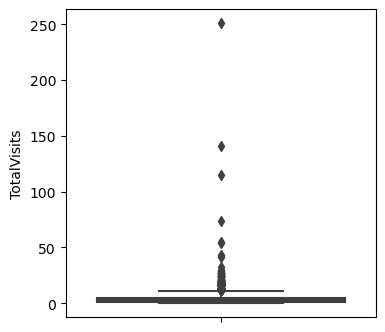

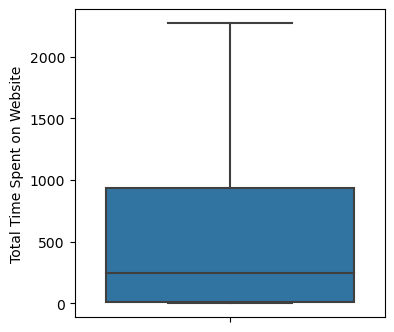

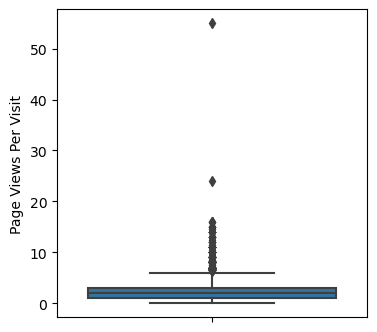

In [77]:
# Univariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_univariate_analysis(c)

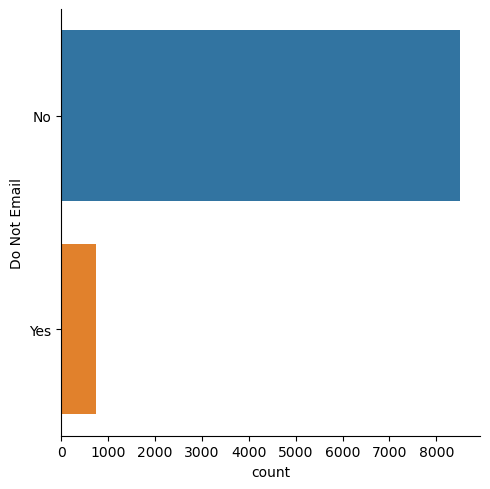

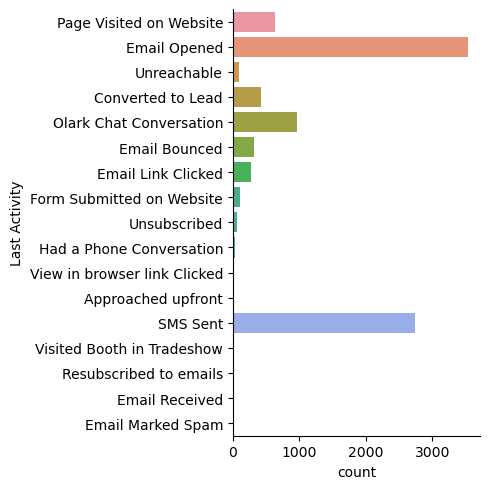

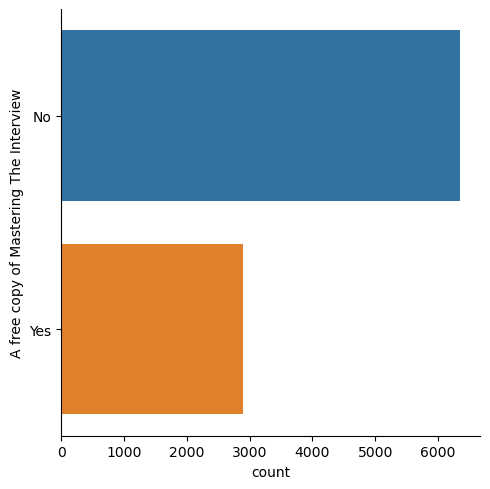

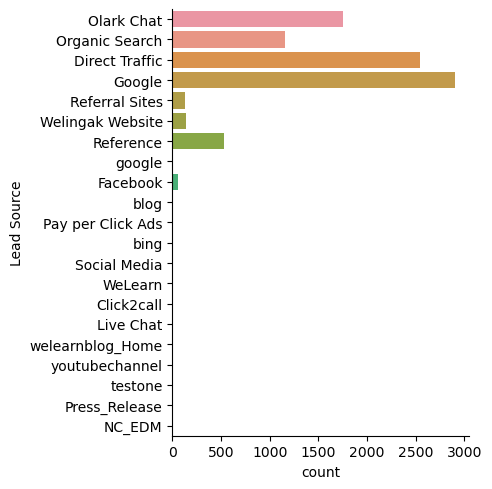

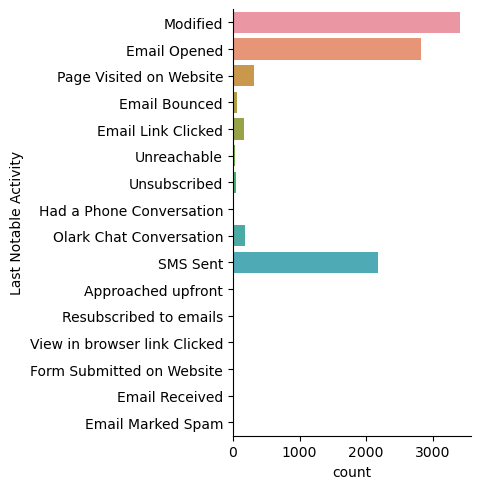

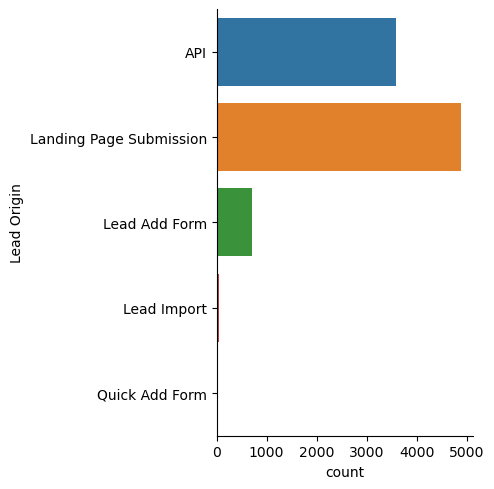

In [78]:
# Univariate Analysis of Numerical Columns
for c in categorical_column:
  cat_col_univariate_analysis(c)

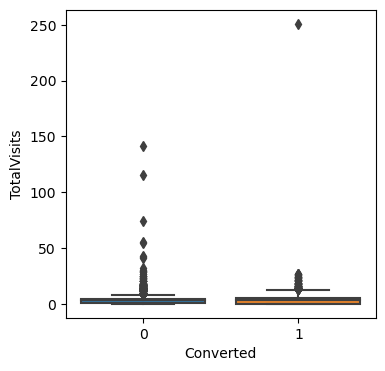

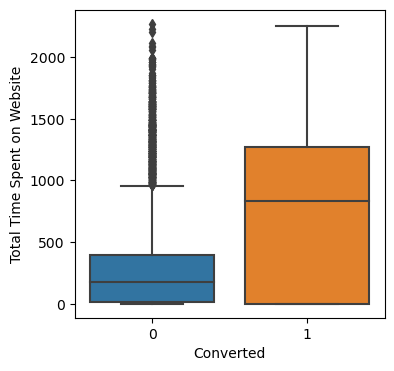

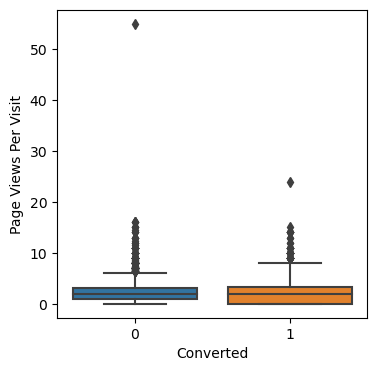

In [79]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_bivariate_analysis('Converted',c)

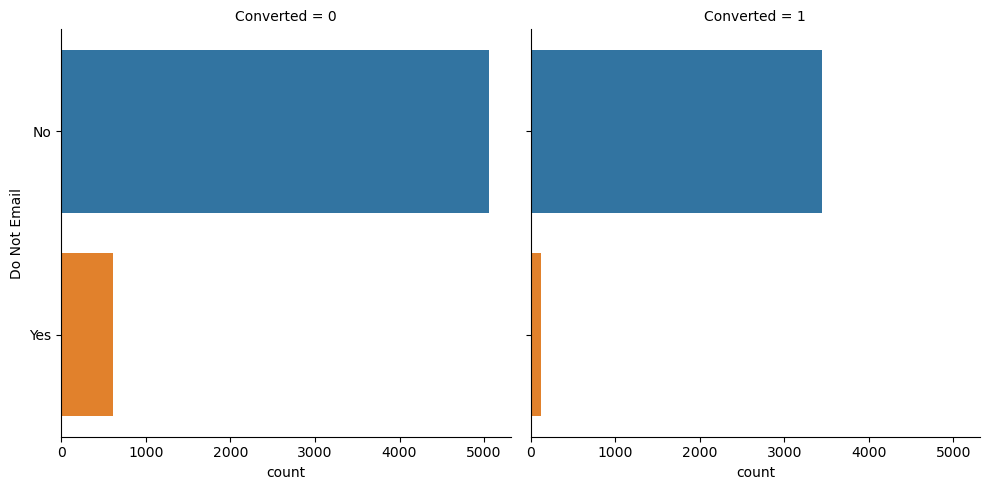

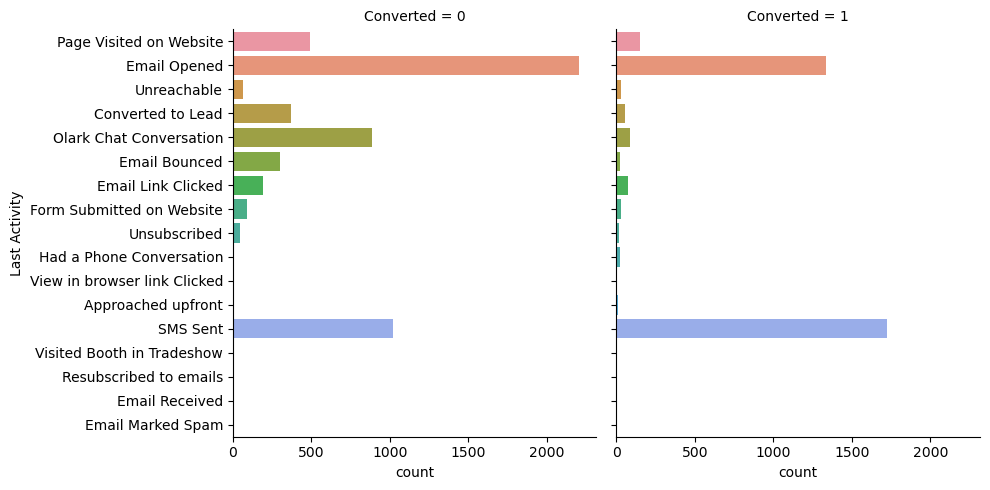

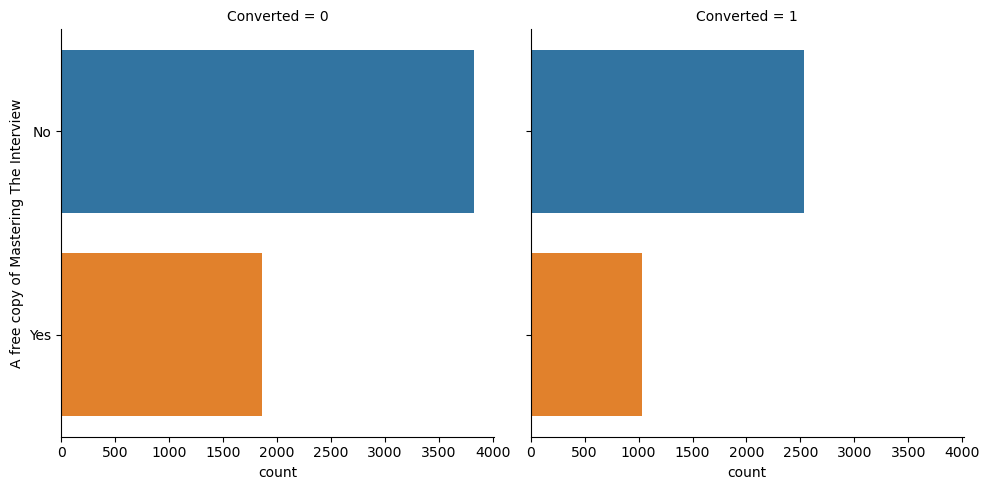

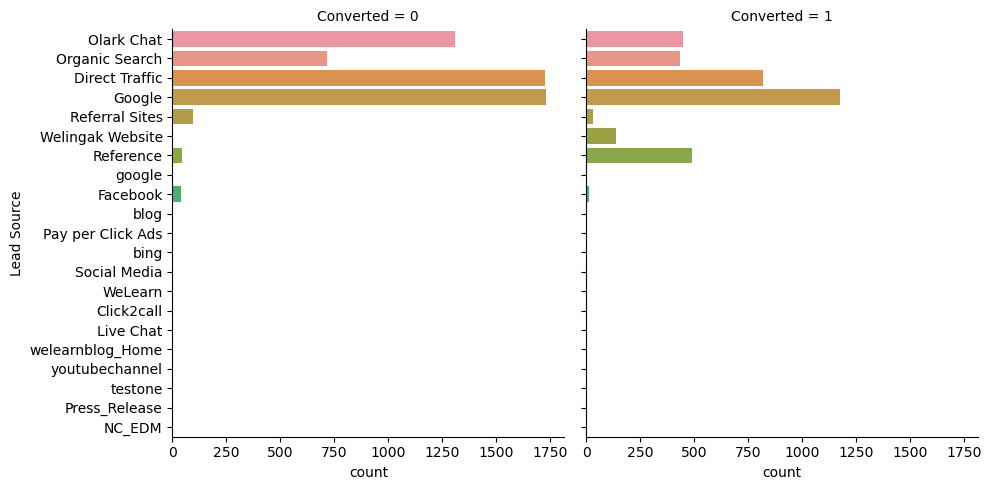

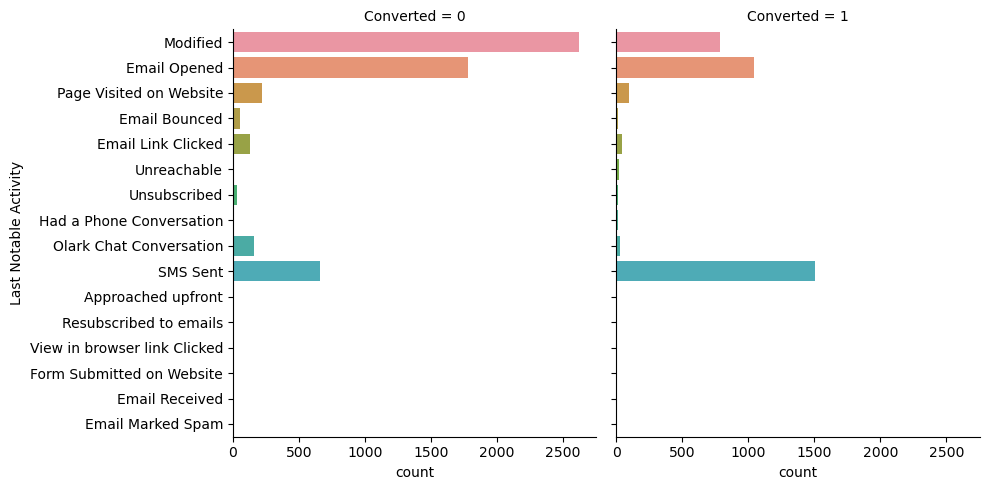

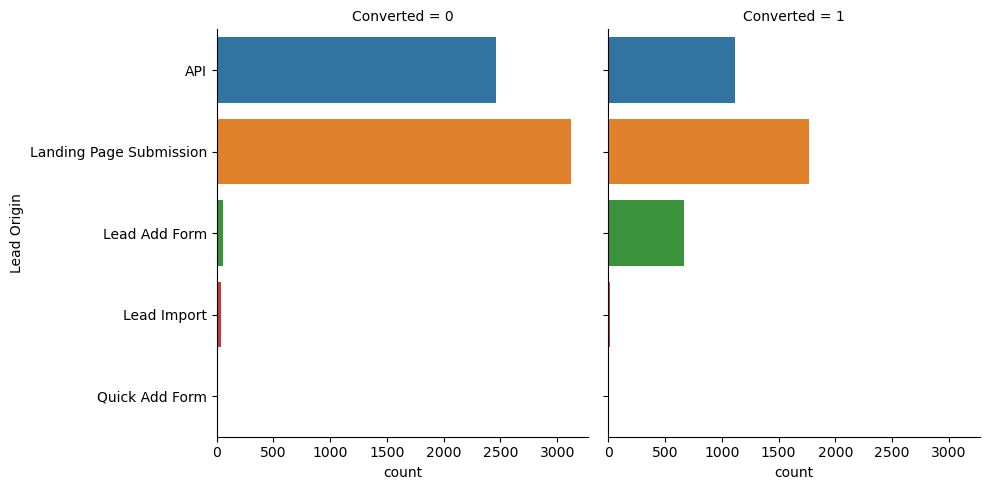

In [80]:
# Bivariate Analysis of Categorical Columns
for c in categorical_column:
  cat_col_bivariate_analysis('Converted',c)

<Axes: >

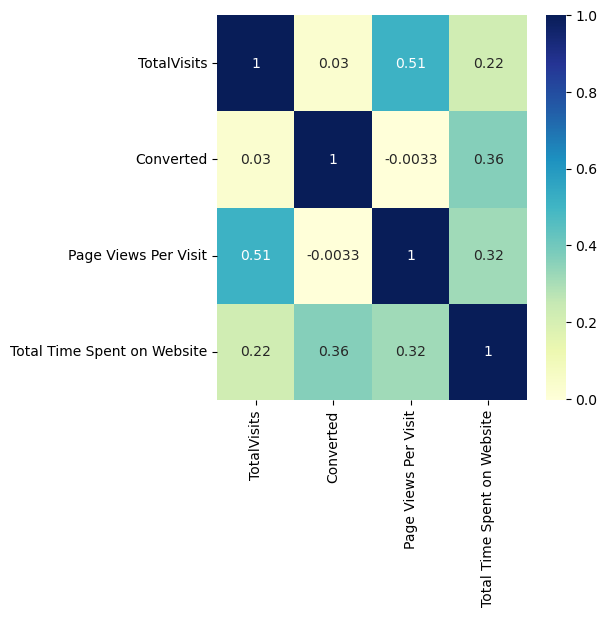

In [81]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(5, 5))
sns.heatmap(df_data.corr(), cmap="YlGnBu",annot=True)

**Summary**: After reviewing the several charts above in EDA (I), we deduce the following points:

1. Univariate analysis Conclusion: 
* Variation in *Page Views Per Visit* and *TotalVisits* is minimal, whereas *Total Time Spent on Website* is higher.
* Outliers in *Page Views Per Visit* and *TotalVisits* should be addressed before modeling.
2. Bivariate analysis Conclusion: 
* There is a positive link between *Total Time Spent on Website* and *Conversion
* There is a correlation between *Conversion* and various category columns, such *Lead Origin* and *Lead Source*.
    
3. Correlation Analysis Conclusion: 
* There is a favorable link between *Total Time Spent on Website* and *Conversion*.
* There is absolutely no link between *Page Views Per Visit* and *TotalVisits* with *Conversion*.



---



## Creating Dummy variables

In [82]:
# Listing out columns for creating dummy variables
df_data[list(categorical_column)].describe()

,Do Not Email,Last Activity,A free copy of Mastering The Interview,Lead Source,Last Notable Activity,Lead Origin
count,9240,9240,9240,9240,9240,9240
unique,2,17,2,21,16,5
top,No,Email Opened,No,Google,Modified,Landing Page Submission
freq,8506,3540,6352,2904,3407,4886


In [83]:
# Creating dummy varaiables and drop_first to avoid multicollinearity
df_data = pd.get_dummies(data=df_data, columns=list(categorical_column), drop_first=True)
del categorical_column
df_data_usable_columns = set(df_data.columns)

In [84]:
# Overview of Dataframe (Shape, Datatype)
print(f'Shape of Data: {df_data.shape}', end="\n\n")
print('Information of Data')
print(f'{df_data.info()}', end="\n\n")
# Overview of Dataframe (Description, % of NaN) 
print('Description of Data')
print(f'{df_data.describe()}', end="\n\n")
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Shape of Data: (9240, 61)

Information of Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   TotalVisits                                         9240 non-null   float64
 1   Converted                                           9240 non-null   int64  
 2   Page Views Per Visit                                9240 non-null   float64
 3   Total Time Spent on Website                         9240 non-null   int64  
 4   Do Not Email_Yes                                    9240 non-null   uint8  
 5   Last Activity_Converted to Lead                     9240 non-null   uint8  
 6   Last Activity_Email Bounced                         9240 non-null   uint8  
 7   Last Activity_Email Link Clicked                    9240 non-null   uint8  
 8   Last Activity_Email Marked Spam

TotalVisits                                           0.0
Converted                                             0.0
Page Views Per Visit                                  0.0
Total Time Spent on Website                           0.0
Do Not Email_Yes                                      0.0
                                                     ... 
Last Notable Activity_View in browser link Clicked    0.0
Lead Origin_Landing Page Submission                   0.0
Lead Origin_Lead Add Form                             0.0
Lead Origin_Lead Import                               0.0
Lead Origin_Quick Add Form                            0.0
Length: 61, dtype: float64



---



## Exploratory Data Analysis (II)

In [85]:
def bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=df_data, kind="count", height=2)
  plt.show()

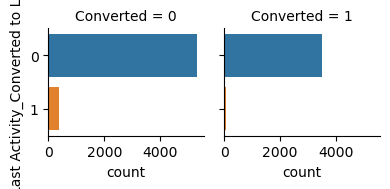

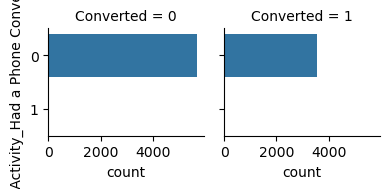

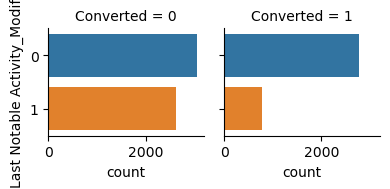

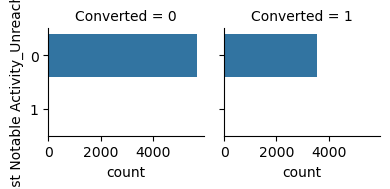

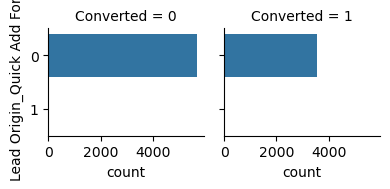

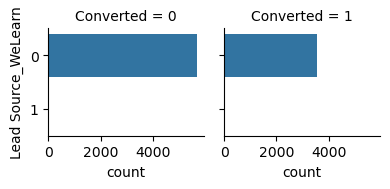

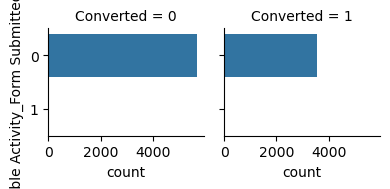

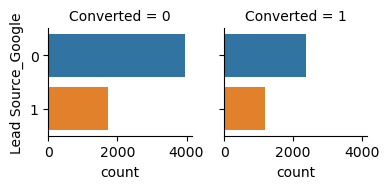

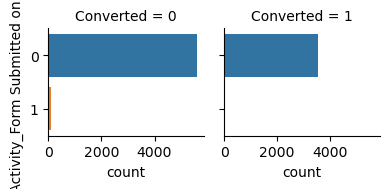

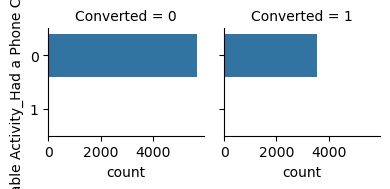

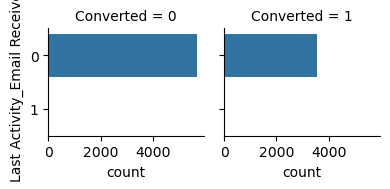

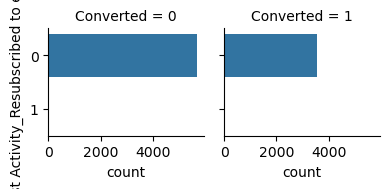

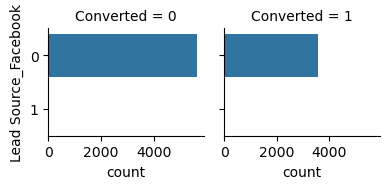

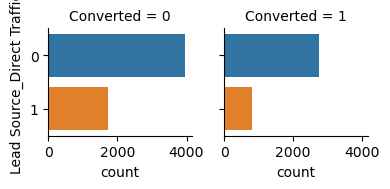

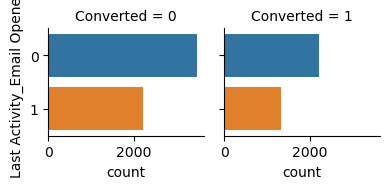

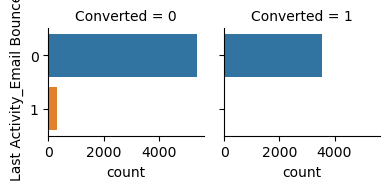

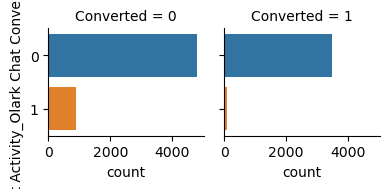

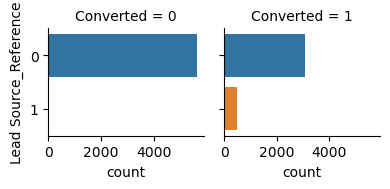

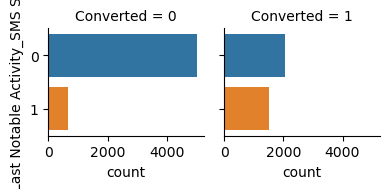

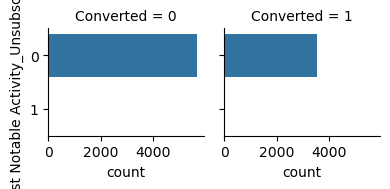

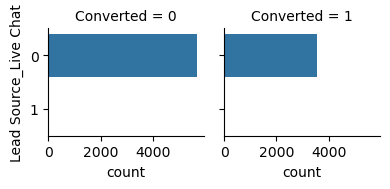

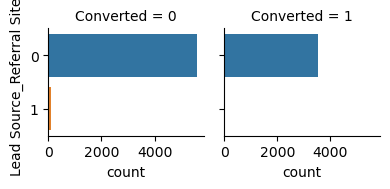

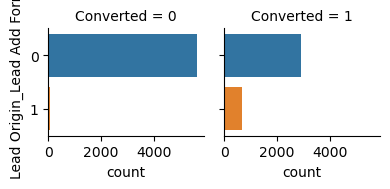

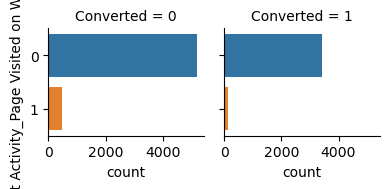

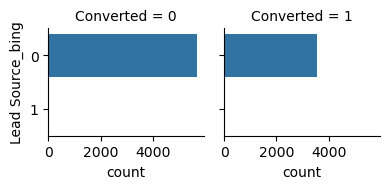

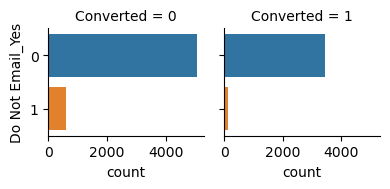

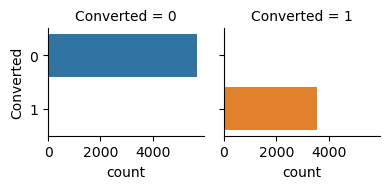

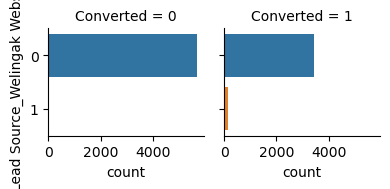

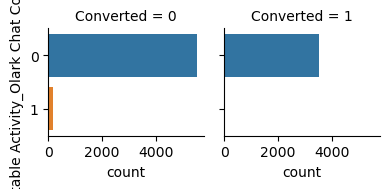

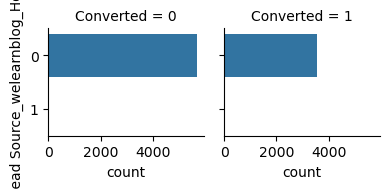

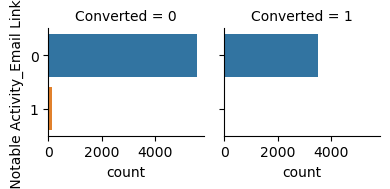

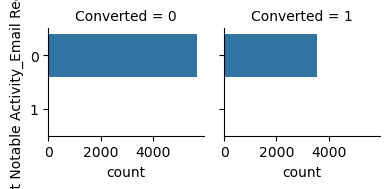

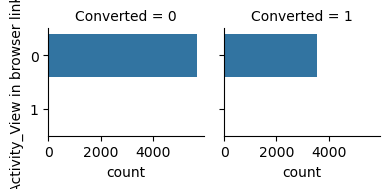

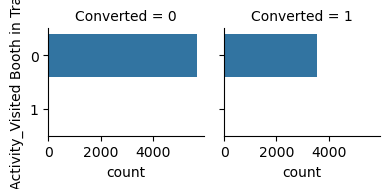

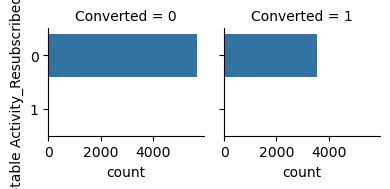

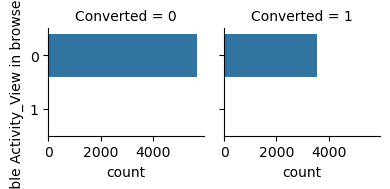

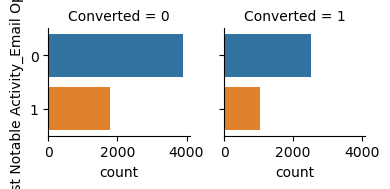

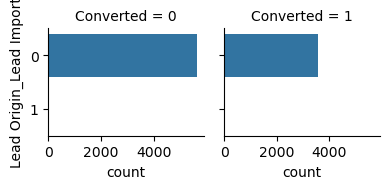

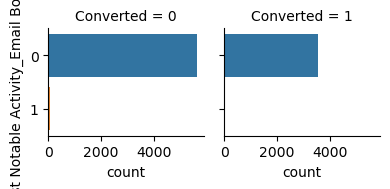

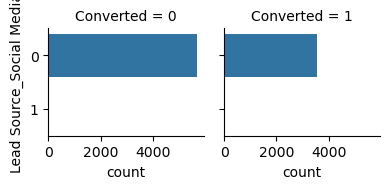

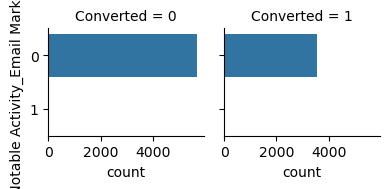

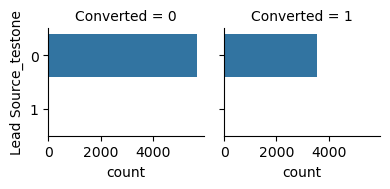

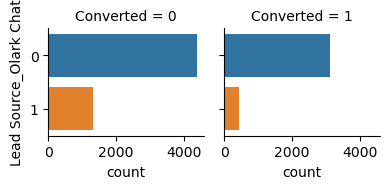

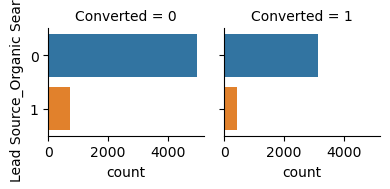

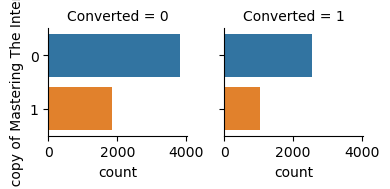

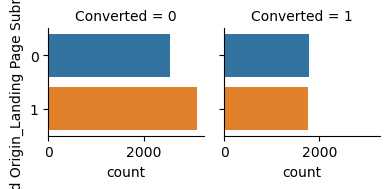

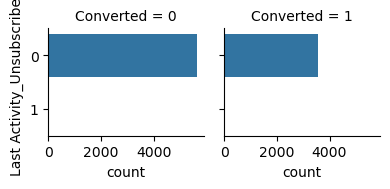

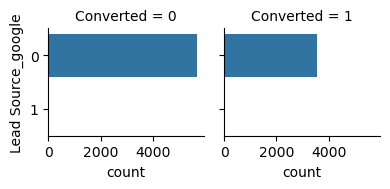

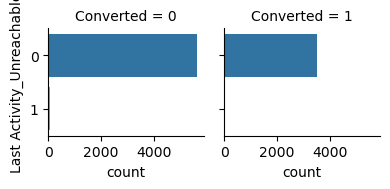

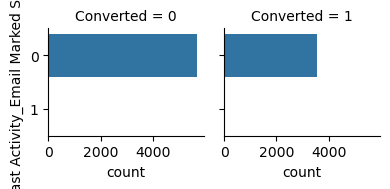

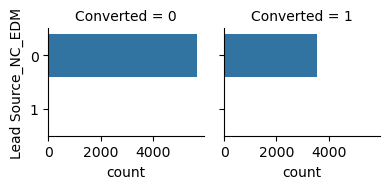

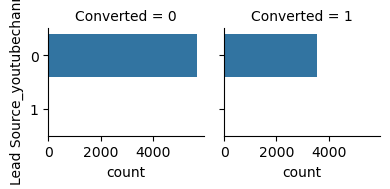

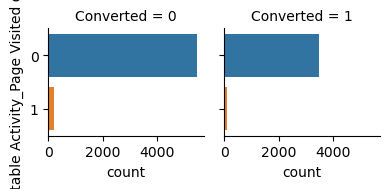

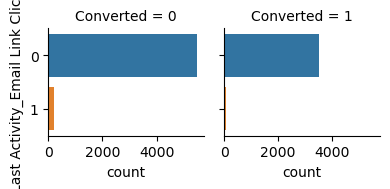

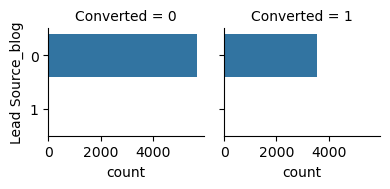

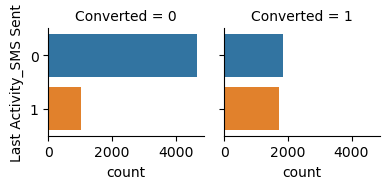

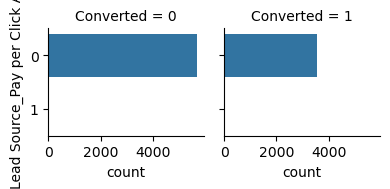

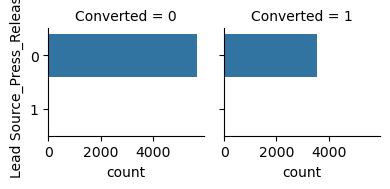

In [86]:
for c in df_data_usable_columns - numerical_column:
  bivariate_analysis('Converted',c)

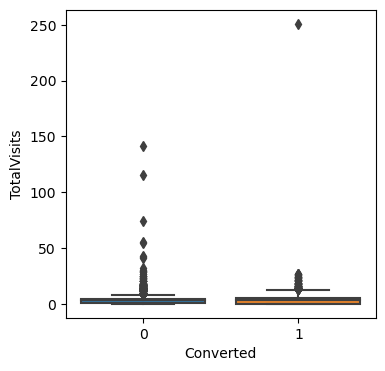

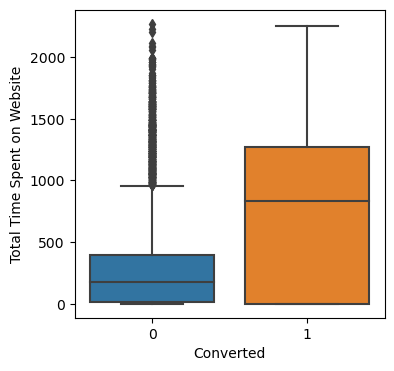

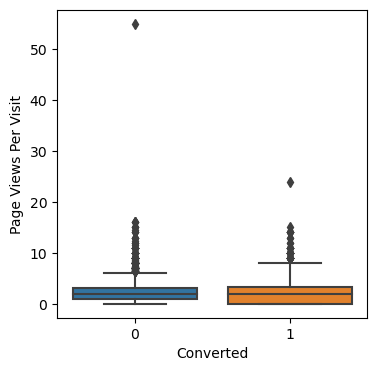

In [87]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_bivariate_analysis('Converted',c)

<Axes: >

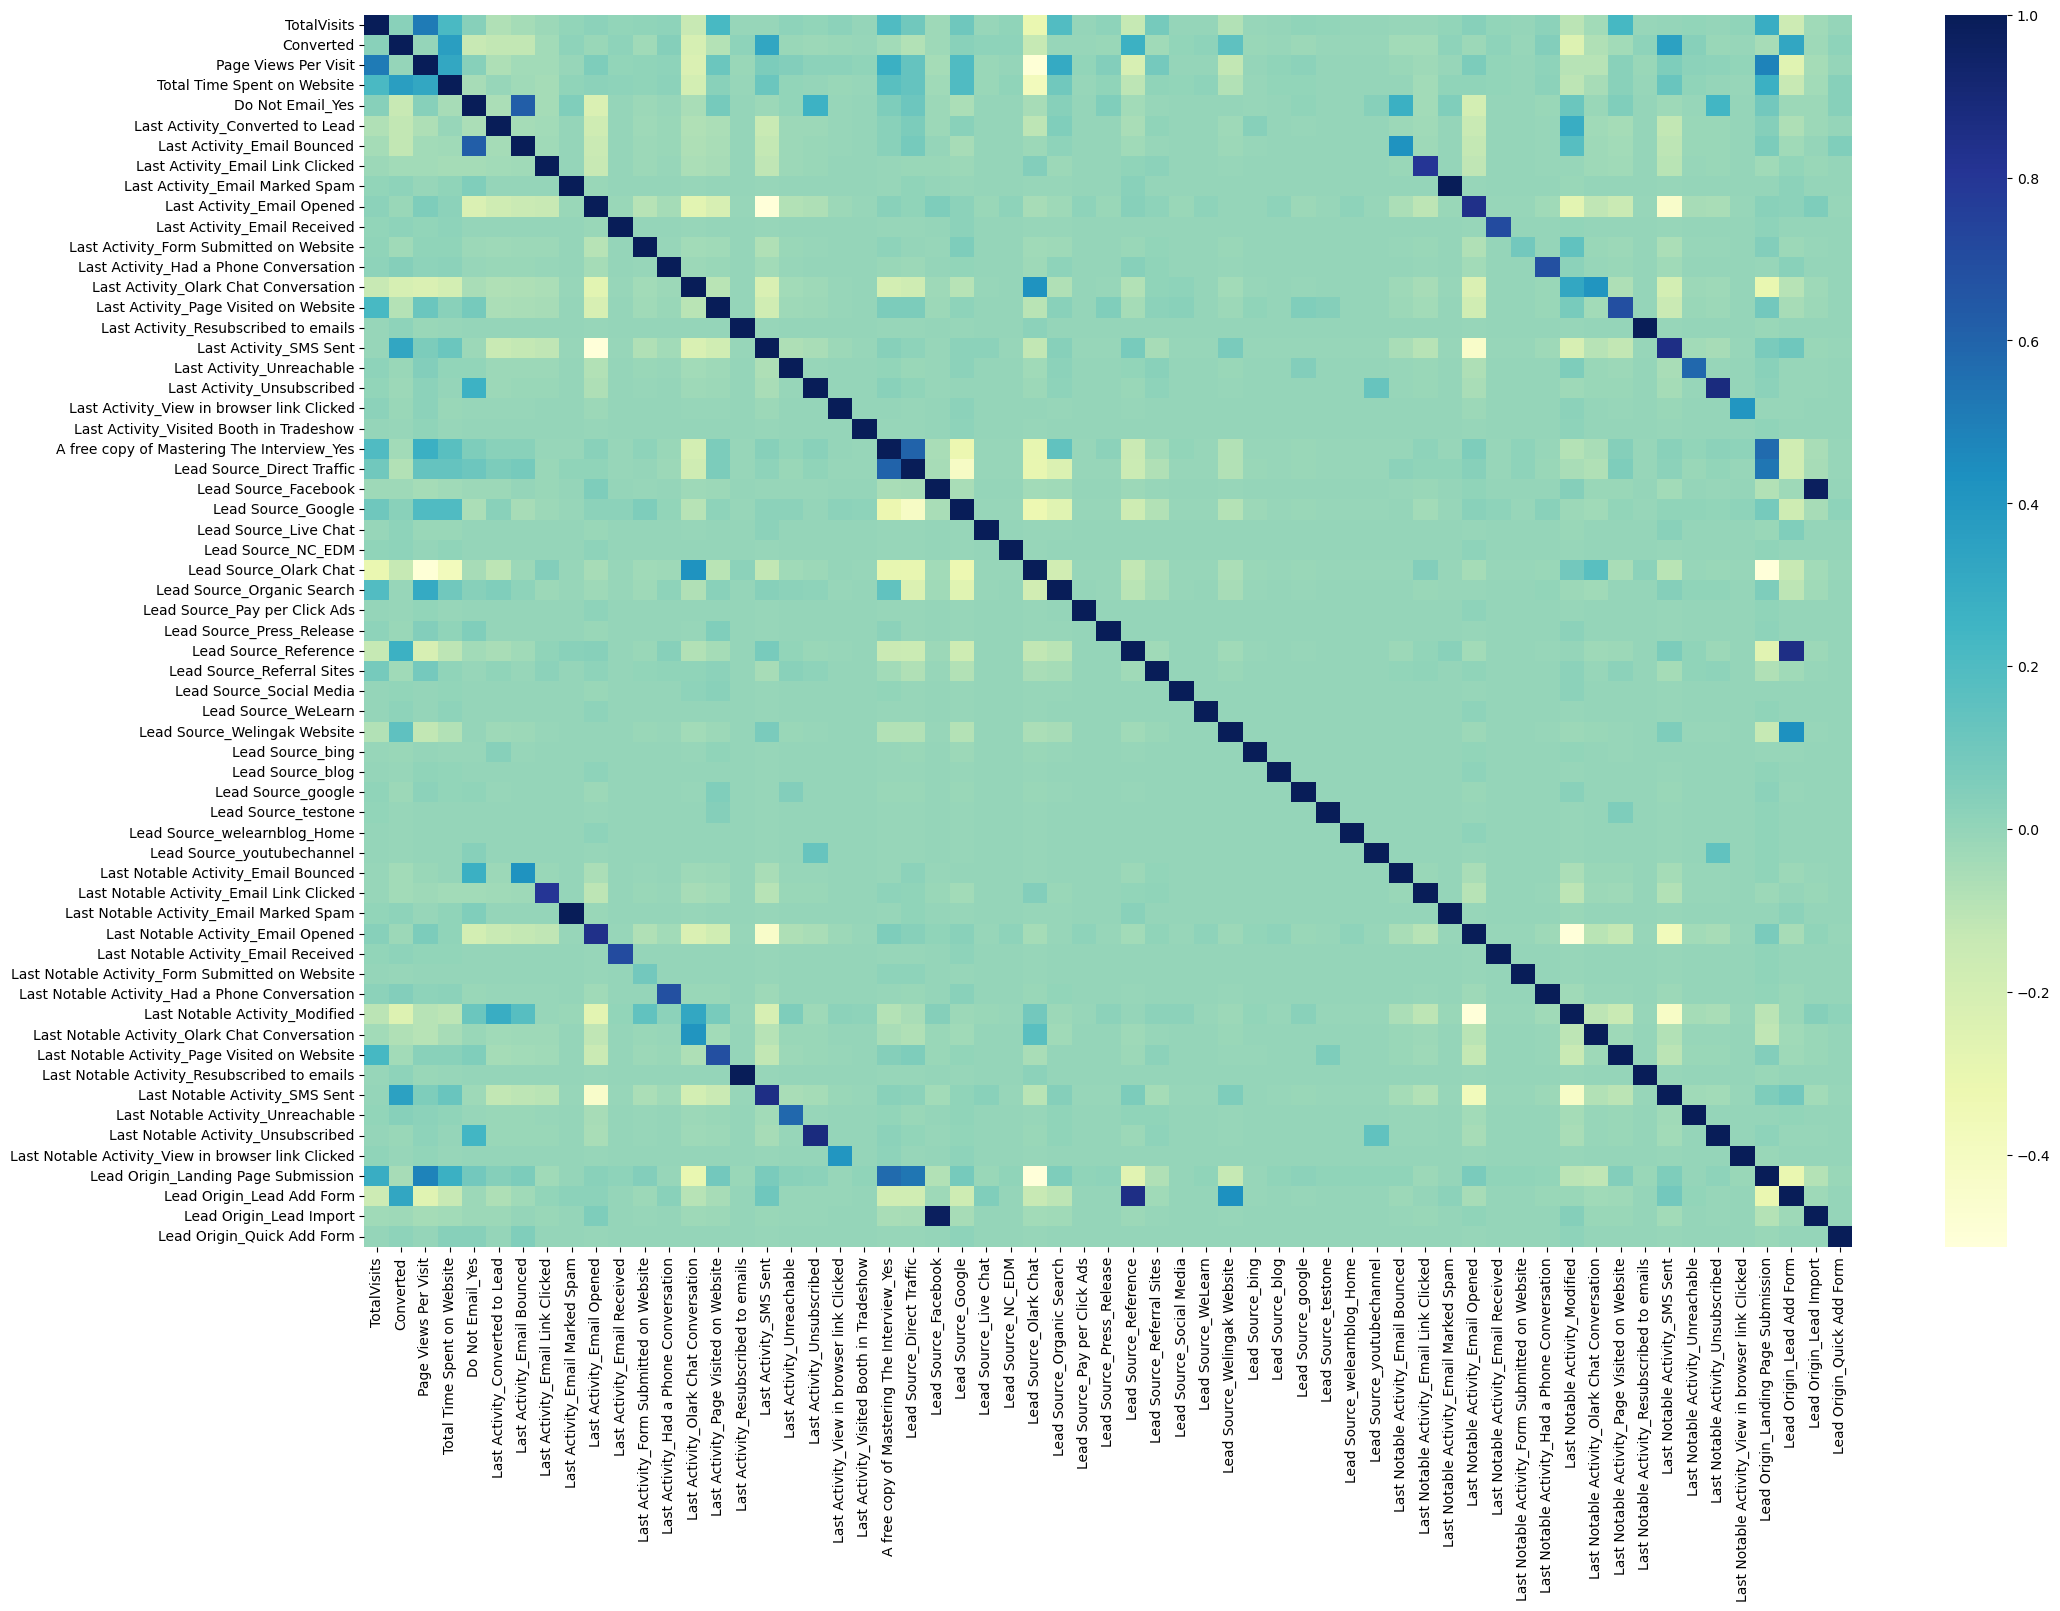

In [88]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(24, 16))
sns.heatmap(df_data.corr(), cmap="YlGnBu")

**Summary**: After reviewing the several charts above in EDA (II), we deduce the following points:

1. Bivariate analysis Conclusion: 
* The dummy variables Lead Origin_Lead Add Form, Last Activity_Email Bounced, Lead Source_Reference, and Total Time Spent on Website appear to have some effect on *Conversion*.

2. Correlation Analysis Conclusion:
* The heatmap is not very visible due to the large number of columns, but we do detect a lot of correlation between columns, particularly dummy variables. To avoid multicollinearity, we would cut the number of columns even further.



---



## Outlier Treatment

In [89]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
z = np.abs(stats.zscore(df_data))
# Outlier Records
df_data_outliers = df_data[(z > 3).any(axis=1)]
# Outlier Removed Records
df_data_non_outliers = df_data[(z < 3).all(axis=1)]
df_data_non_outliers.head()

,TotalVisits,Converted,Page Views Per Visit,Total Time Spent on Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form
1,5.0,0,2.5,674,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1,2.0,1532,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2.0,1,2.0,1640,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0




---



## Feature Standardization / Normalization

In [90]:
# Normalising continuous features (numerical columns)
df = df_data_non_outliers[list(numerical_column)]
normalized_df=(df-df.mean())/df.std()
df_data_non_outliers.drop(columns=numerical_column,axis=1,inplace=True)
df_data_normal_non_outliers = pd.concat([df_data_non_outliers,normalized_df],axis=1)

print(f'Percentage of data retained: {100*(df_data_normal_non_outliers.shape[0]/df_data.shape[0]):.2}')
df_data_normal_non_outliers.head()

Percentage of data retained: 6.5e+01


,Converted,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,...,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.621490,0.264746,0.046638
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,-0.467274,1.796143,-0.224659
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.193117,-0.938240,-1.309847
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,-0.467274,1.988906,-0.224659
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.193117,-0.938240,-1.309847




---



## Splitting Data into Training and Test Sets

In [91]:
# Putting feature variable to X
X = df_data_normal_non_outliers.drop(['Converted'],axis=1)
# Putting response variable to y
y = df_data_normal_non_outliers['Converted']

y.head()

1    0
2    1
5    0
6    1
7    0
Name: Converted, dtype: int64

In [92]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3)



---



## Building Model

## Building Model : Feature Selection using RFE for Logistic Regression

In [93]:
# Running RFE with the output number of the variable equal to 25
logreg = LogisticRegression(C=1e-5,max_iter=50)
rfe = RFE(logreg, 25) 
rfe = rfe.fit(X,y)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [94]:
# Ranking of columns w.r.t ranking
print(rfe.ranking_) 

NameError: name 'rfe' is not defined

In [95]:

# Listing out the top 25 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

NameError: name 'rfe' is not defined

In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
def build_lr_model(col):
  print(f'Columns Count : {len(col)}')
  print(f'Columns : {col}')
  print('='*78)
  
  # Running the model using the selected variables
  X_train_sm = sm.add_constant(X_train[col])
  logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logm4.fit()
  print(res.summary())
  
  # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
  print(f'Computing VIF values to keep track of multicollinearity')
  print('='*78)
  vif = pd.DataFrame()
  vif['Features'] = X_train[col].columns
  vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif, end='\n'+'='*78+'\n')
  
  # Getting the predicted values on the train set
  y_train_pred = res.predict(X_train_sm).values.reshape(-1)
  
  # Creating a dataframe with the actual churn flag and the predicted probabilities
  y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
  y_train_pred_final['Lead_ID'] = y_train.index
  y_train_pred_final.head()
  
  # Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0
  y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
  
  # Let's check the overall accuracy.
  print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
  print('='*78)
  
  # Let's take a look at the confusion matrix again 
  confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
  draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
  
def build_lr_model_advanced(col):
  
  print(f'Columns : {col}')
  print('='*78)
  
  # Running the model using the selected variables
  X_train_sm = sm.add_constant(X_train[col])
  logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logm4.fit()
  print(res.summary())
  
  # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
  print(f'Computing VIF values to keep track of multicollinearity')
  print('='*78)
  vif = pd.DataFrame()
  vif['Features'] = X_train[col].columns
  vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif, end='\n'+'='*78+'\n')
  
  # Getting the predicted values on the train set
  y_train_pred = res.predict(X_train_sm).values.reshape(-1)
  
  # Creating a dataframe with the actual churn flag and the predicted probabilities
  y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
  y_train_pred_final['Lead_ID'] = y_train.index
  y_train_pred_final.head()
  
  # Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0
  y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
  
  # Let's check the overall accuracy.
  print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
  print('='*78)
  
  # Let's take a look at the confusion matrix again 
  confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
  draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
  
  # Let's create columns with different probability cutoffs 
  numbers = [float(x)/10 for x in range(10)]
  for i in numbers:
      y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
      
  # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
  cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
  from sklearn.metrics import confusion_matrix

  num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  for i in num:
      cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
      total1=sum(sum(cm1))
      accuracy = (cm1[0,0]+cm1[1,1])/total1

      speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
      sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
      cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
  
  # Let's plot accuracy sensitivity and specificity for various probabilities.
  cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
  plt.show()
  
  # Ask for user input based on curve, for the cut-off value
  # cutoff = float(input('What should be the cut-off based on above plot (example 0.5)?'))
  print('Taking cut-off value as 0.35, from the plot above')
  cutoff = 0.35 # Taking value after observing graph
  
  y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > cutoff else 0)
  
  # Let's check the updated accuracy.
  print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)}')
  print('='*78)
  
  # Let's check the Precision Score.
  print(f'Precision Score: {precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
  print('='*78)
  
  # Let's check the Recall Score.
  print(f'Recall Score: {recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
  print('='*78)
  
  # Let's plot Precision-Recall Curve
  p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
  plt.plot(thresholds, p[:-1], "g-")
  plt.plot(thresholds, r[:-1], "r-")
  plt.show()
  # Ask for user input based on curve, for the cut-off value
  # cutoff = float(input('What should be the cut-off based on above plot (x-axis of intersection, generally)?'))
  print('Taking cut-off value as 0.42, from the plot above')
  cutoff = 0.42 # Taking value after observing graph
  
  # Making Prediction of Test Set
  X_test_sm = sm.add_constant(X_test[col])
  y_test_pred = res.predict(X_test_sm)
  y_pred_1 = pd.DataFrame(y_test_pred)
  # Converting y_test to dataframe
  y_test_df = pd.DataFrame(y_test)
  # Removing index for both dataframes to append them side by side 
  y_pred_1.reset_index(drop=True, inplace=True)
  y_test_df.reset_index(drop=True, inplace=True)
  # Appending y_test_df and y_pred_1
  y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
  # print(y_pred_final)
  # Renaming the column 
  y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Probability'})
  # Rearranging the columns
  y_pred_final = y_pred_final.reindex_axis(['Lead_ID','Converted','Conversion_Probability'], axis=1)
  y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > cutoff else 0)
  
  # Let's check the overall accuracy on Test set
  print(f'Overall accuracy on Test set: {metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)}')
  print('='*78)
  
  confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
  confusion2
  TP = confusion2[1,1] # true positive 
  TN = confusion2[0,0] # true negatives
  FP = confusion2[0,1] # false positives
  FN = confusion2[1,0] # false negatives
  # Let's see the sensitivity of our logistic regression model
  print(f'sensitivity of our logistic regression model: {TP / float(TP+FN)}')
  print('='*78)
  # Let's see the specificity of our logistic regression model
  print(f'specificity of our logistic regression model: {TN / float(TN+FP)}')
  print('='*78)

## Building Model using Logistic Regression

In [97]:
# MODEL 1
# Let's consider all 25 the columns suggested by RFE for our next model
selected_predictors = set(auto_selected_predictors)
removed_predictors = set()
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'auto_selected_predictors' is not defined

In [98]:
# MODEL 2
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Resubscribed to emails')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

In [99]:
# MODEL 3
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Direct Traffic')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

In [100]:
# MODEL 4
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Organic Search')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

In [101]:
# MODEL 5
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_Email Opened')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

In [102]:
# MODEL 6
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Welingak Website')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

In [103]:
# MODEL 7
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Page Visited on Website')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

In [104]:
# MODEL 8
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_SMS Sent')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

In [105]:
# MODEL 9
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_View in browser link Clicked')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

In [106]:
# MODEL 10
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_Modified')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

In [107]:
# MODEL 11
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Email Opened')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

In [108]:
# MODEL 12
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('A free copy of Mastering The Interview_Yes')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

In [109]:
# MODEL 13
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_Email Marked Spam')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

In [110]:
# MODEL 14
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Had a Phone Conversation')
build_lr_model(list(selected_predictors-removed_predictors))

NameError: name 'removed_predictors' is not defined

**Note: VIF as well as accuracy looks fine, thus computing more metrics for this model.**

## Final Model Building and Analysis

In [111]:
# Building model again, and obtaining additional parameters like cut-off
# Making predictions on Test set using this final model
build_lr_model_advanced(list(selected_predictors-removed_predictors))

NameError: name 'selected_predictors' is not defined

In [112]:
# Analysis of columns in our final model w.r.t. 'Converted'
col = list(selected_predictors-removed_predictors)
col.append('Converted')
plt.figure(figsize=(15, 8))
sns.heatmap(df_data_normal_non_outliers[col].corr(), cmap="YlGnBu",annot=True)

NameError: name 'selected_predictors' is not defined

**Final Model Summary**:
* 1. Overall accuracy on Test set: 0.786
* 2. sensitivity of our logistic regression model: 0.733
* 3. specificity of our logistic regression model: 0.823
* 4. Top 3 variables in model, that contribute towards lead conversion are: 
        * a. Total Time Spent on Website
        * b. Last Notable Activity_SMS Sent
        * c. TotalVisits
* 5. Top 3 variables in my model, that should be focused are:
        * a. Last Activity_SMS Sent (positively impacting)
        * b. Last Activity_Olark Chat Conversation (negatively impacting)
        * c. Lead Source_Olark Chat (negatively impacting)




---



## Verifying if sufficient accuracy is achieved using Logistic Regression
## Building Model Using PCA to Verify Model Accuracy

## Performing PCA Pre-Requisites

In [113]:
#Initializing the PCA module
pca = PCA(svd_solver='randomized', random_state=100)

In [114]:
#Doing the PCA on the train data
pca.fit(df_data_normal_non_outliers)

PCA(random_state=100, svd_solver='randomized')

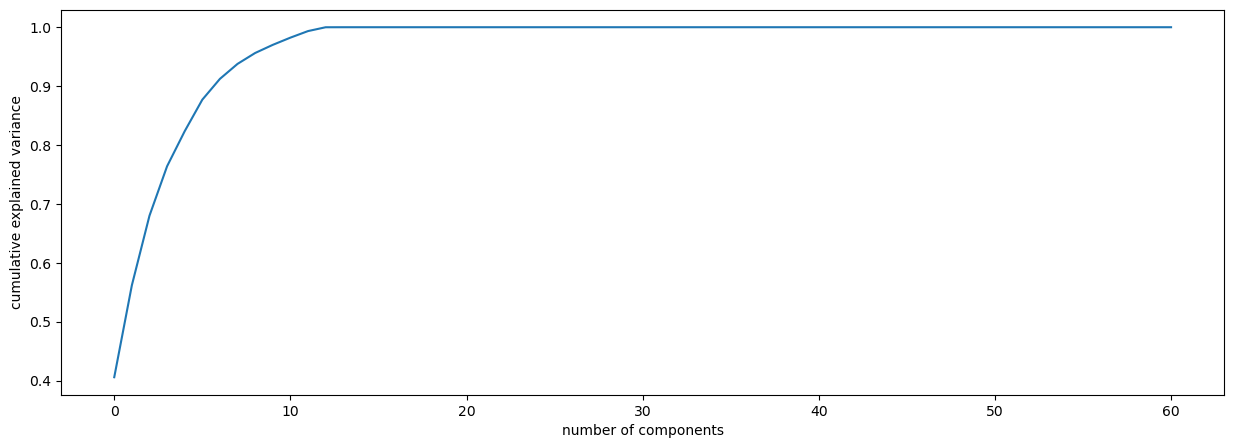

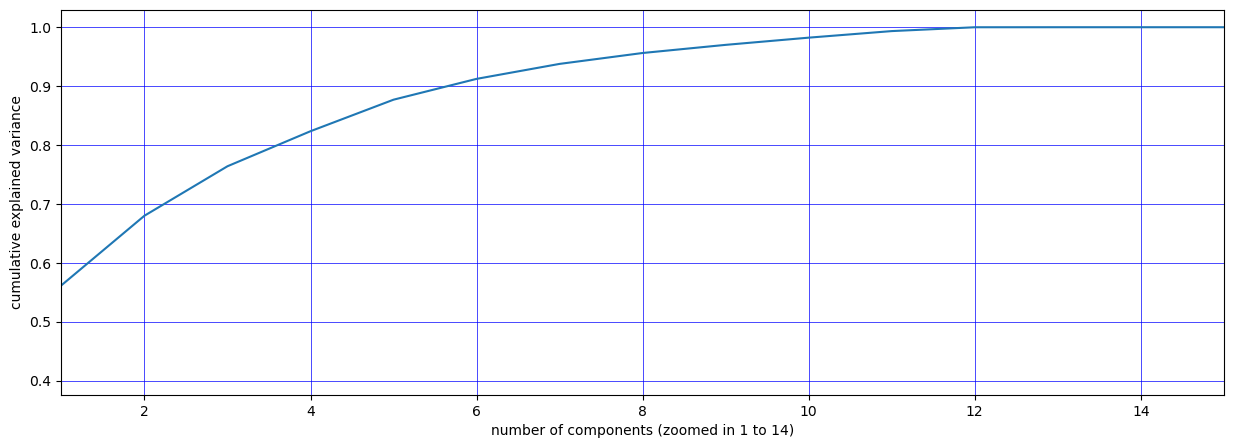

In [115]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (15,5))
ax = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

fig = plt.figure(figsize = (15,5))
ax = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components (zoomed in 1 to 14)')
plt.ylabel('cumulative explained variance')
plt.grid(color='b', linestyle='-', linewidth=.5)
plt.xlim(1,15)
plt.show()



---



## Performing PCA (Moderate Accuracy) with 75% Variance Cut-off

In [116]:
X_train.shape

(4181, 60)

In [117]:
# Since our dataset is large enough, we will use incremental PCA
pca_moderate = PCA(0.75)

In [118]:
df_train_pca_moderate = pca_moderate.fit_transform(X_train)
df_train_pca_moderate.shape
# PCA selected 5 components to explain 90% variance in data

(4181, 4)

In [119]:
# Training the Regression Model
learner_pca_moderate = LogisticRegression()
model_pca_lr_moderate = learner_pca_moderate.fit(df_train_pca_moderate,y_train)

In [120]:
df_test_pca_moderate = pca_moderate.transform(X_test)
df_test_pca_moderate.shape

(1792, 4)

In [121]:
#Making prediction on the test data
pred_proba_test_moderate = model_pca_lr_moderate.predict_proba(df_test_pca_moderate)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_proba_test_moderate))

'0.78'



---



## Performing PCA (High Accuracy) with 90% Variance Cut-Off

In [122]:
X_train.shape

(4181, 60)

In [123]:
# Since our dataset is large enough, we will use incremental PCA
pca_high = PCA(0.90)

In [124]:
df_train_pca_high = pca_high.fit_transform(X_train)
df_train_pca_high.shape
# PCA selected 7 components to explain 90% variance in data

(4181, 7)

In [125]:
# Training the Regression Model
learner_pca_high = LogisticRegression()
model_pca_lr_high = learner_pca_high.fit(df_train_pca_high,y_train)

In [126]:
df_test_pca_high = pca_high.transform(X_test)
df_test_pca_high.shape

(1792, 7)

In [127]:
#Making prediction on the test data
pred_proba_test_high = model_pca_lr_high.predict_proba(df_test_pca_high)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_proba_test_high))

'0.82'

## Conclusion
* In comparison to the model produced using PCA, our Logistic Regression Model is adequate and accurate. <br>

* To boost the total conversion rate, X Education Company should focus on the following critical areas:
  * a. Increase user engagement on their website, as this leads to increased conversion.
  * b. Increase the frequency of sending SMS messages, as this leads to better conversions.
  * c. Increase total visits through advertising, etc., as this leads to higher conversions.
  * d. Improve the Olark Chat service because it is hurting the conversion badly.
    